# Part1 : Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 결측치 확인
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked feature는 결측값을 가지고 있음

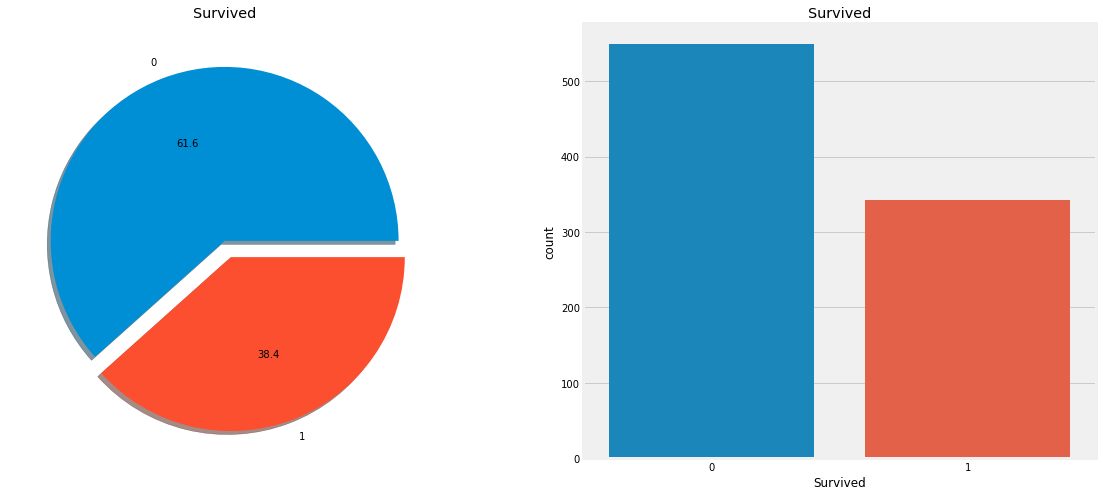

In [4]:
# 생존자 비율, 수 확인
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1],autopct='%.1f',ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- train 세트의 891명 중 350명, 즉 38.4%만 생존함

### Types Of Features 

Categorical Features (범주형 변수)
- 하나 또는 두개 이상의 범주를 갖는 변수로, 각 feature의 값들은 그 범주들에 의해 분류
- Sex, Embarked

Ordinal Features (순서형 변수)
- 범주형 변수와 비슷하지만 값 사이의 상대적인 순서 또는 정렬을 가질 수 있음
- Pclass

Continuous Feature(연속형 변수)
- 어떤 두 점 사이 또는 feature 칼럼의 최소 또는 최대 사이의 값을 얻을 수 있다면 연속적
- Age

## Analysing The Features

### Sex - Categorical Feature

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

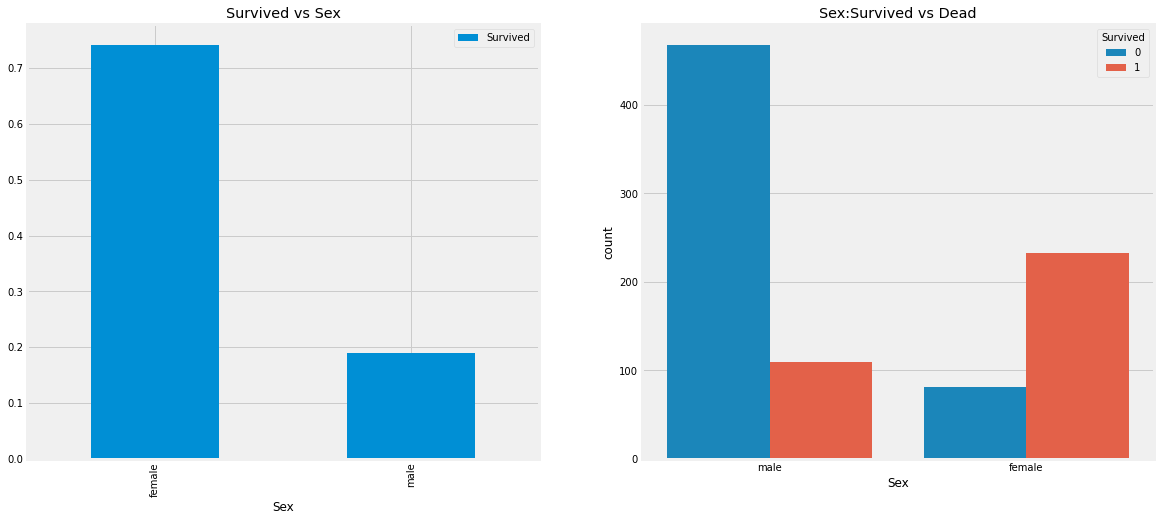

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 탑승한 남성의 수가 여성의 수보다 많지만, 생존한 여성의 수는 생존한 남성의 수의 약 두 배
- 생존확률은 여성이 약 75%, 남성이 약 18-19%

### Pclass - Ordinal Feature

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


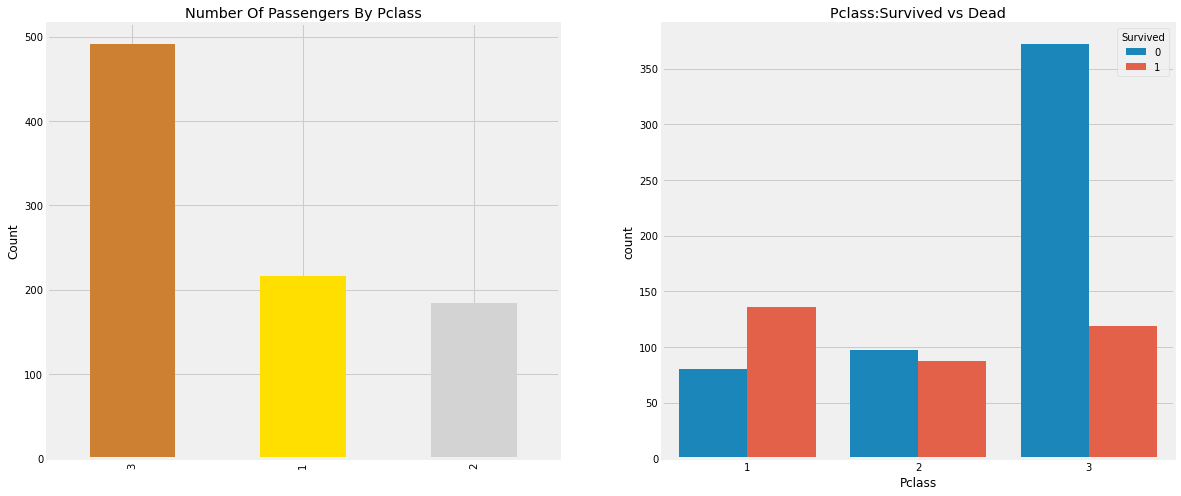

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass 1의 승객이 더 많이 구조되었음을 확인할 수 있음
- Pclass 3의 승객 수가 훨씬 더 많았지만, 생존확률은 25%로 매우 낮음
- Pclass 1의 승객은 약 63%, Pclass 2는 약 48% 생존

### Sex, Pclass로 생존확률 확인

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

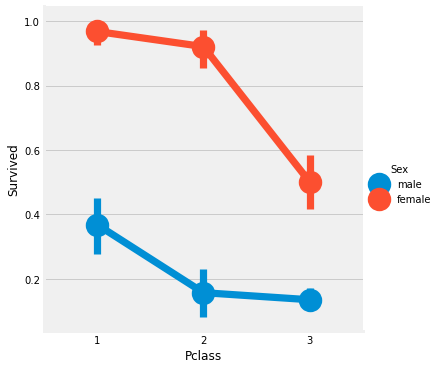

In [10]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

- Pclass 1의 여성의 생존확률은 약 95~96%, Pclass 1 여성 94명 중 3명만이 사망
- Pclass와 상관없이 여성들은 구조하는 동안 최우선 순위가 주어졌음이 분명 ∵ Pclass의 남성조차도 생존확률이 매우 낮음

### Age - Continuous Feature

In [11]:
print('Oldest Passenger was of:',data['Age'].max(), 'Years')
print('Youngest Passenger was of:',data['Age'].min(), 'Years')
print('Average Age on the ship:',data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


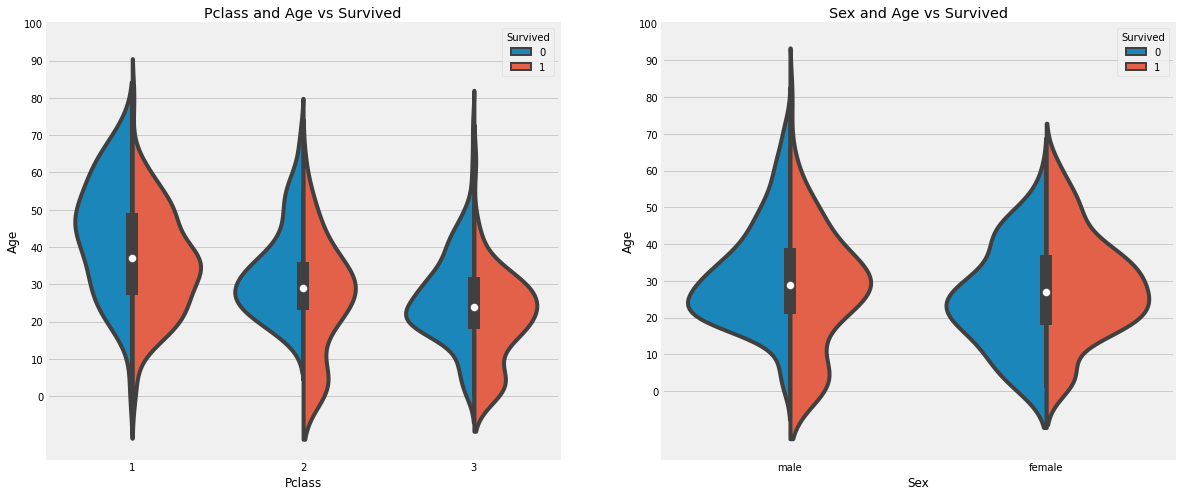

In [12]:
f,ax=plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- Pclass가 증가함에 따라 어린이의 수가 증가하고, 10세 미만의 승객은 Pclass와 상관없이 생존확률이 높아보임
- Pclass 1에서 20 - 50세의 승객의 생존확률이 높으며, 특히 여성의 경우 더 높음
- 남성의 경우, 나이가 증가함에 따라 생존확률이 감소함

문제
- Age feature은 177개의 결측값을 가지고 있음 
- 결측값을 대체하기 위해 데이터세트의 평균 나이를 할당할 수 있지만 문제는 다양한 연령대를 가진 많은 사람들이 있다는 점 
- 4세 아이에게 평균 나이인 29세를 할당할 수 없음 !

해결방법
- Name feature를 확인해보면 Mr, Mrs와 같은 호칭을 가지고 있음을 확인할 수 있음 
- 따라서 Mr, Mrs의 평균 값을 각 그룹에 할당

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  
    # '([A-Za-z]+)\.' : 모든 알파벳 문자열 다음에 dot(.)으로 마무리하는 문자열 추출
    # [a-zA-Z]: 알파벳 모두
    # + : 1번 이상 반복
    # . : 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨
    # Mr,Miss 등 영어 호칭이 추출

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], 
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Age 결측값 채우기

In [17]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age']=46

In [18]:
data.Age.isnull().any()

False

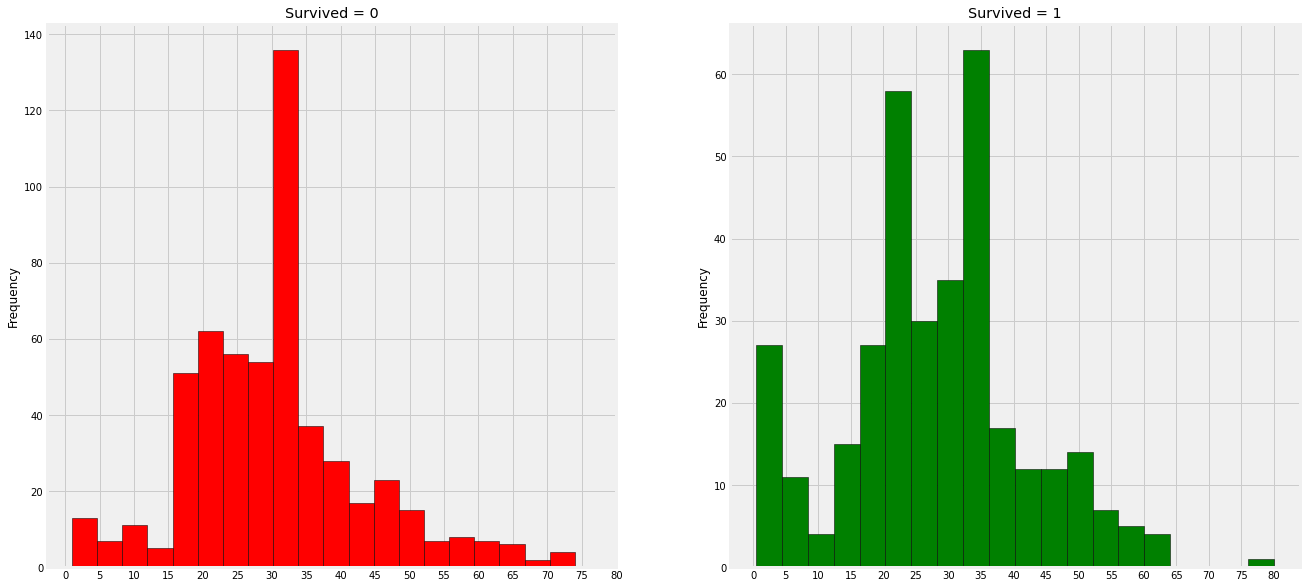

In [19]:
f,ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

- 유아(5살 미만) 승객이 많이 생존
- 가장 나이 많은 승객(80살)은 생존
- 가장 많이 사망한 나이대는 30-40

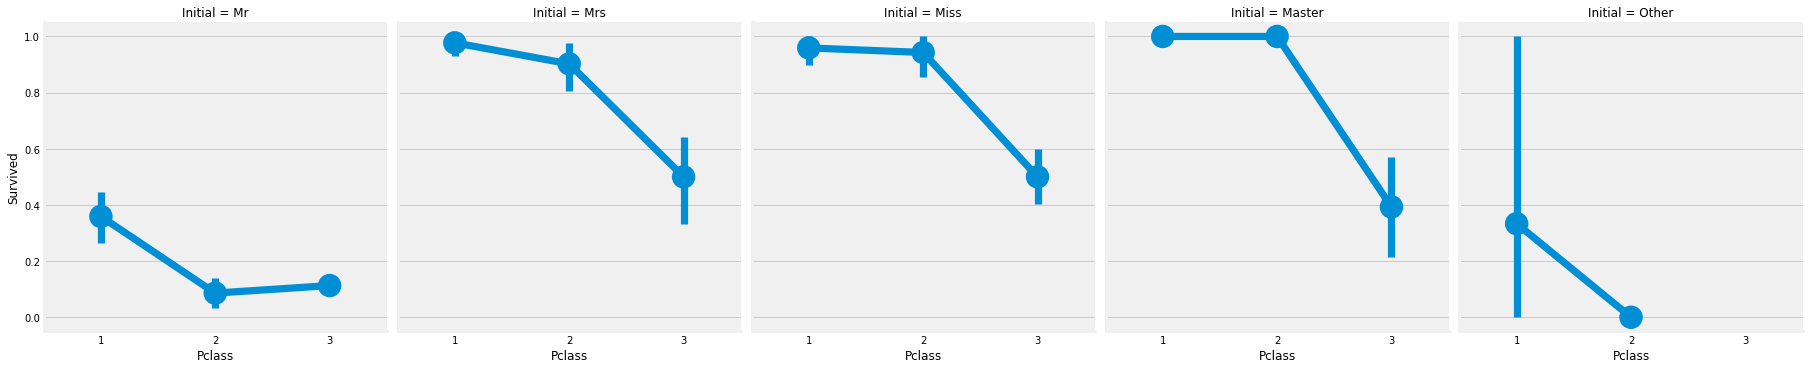

In [20]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

### Embarked - Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

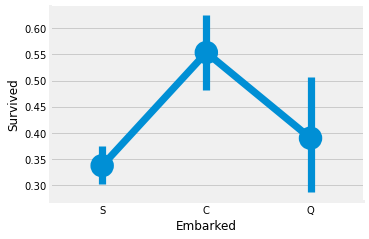

In [22]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

- 항구 C의 생존 확률은 약 0.55로 가장 높지만, 항구 S는 가장 낮음

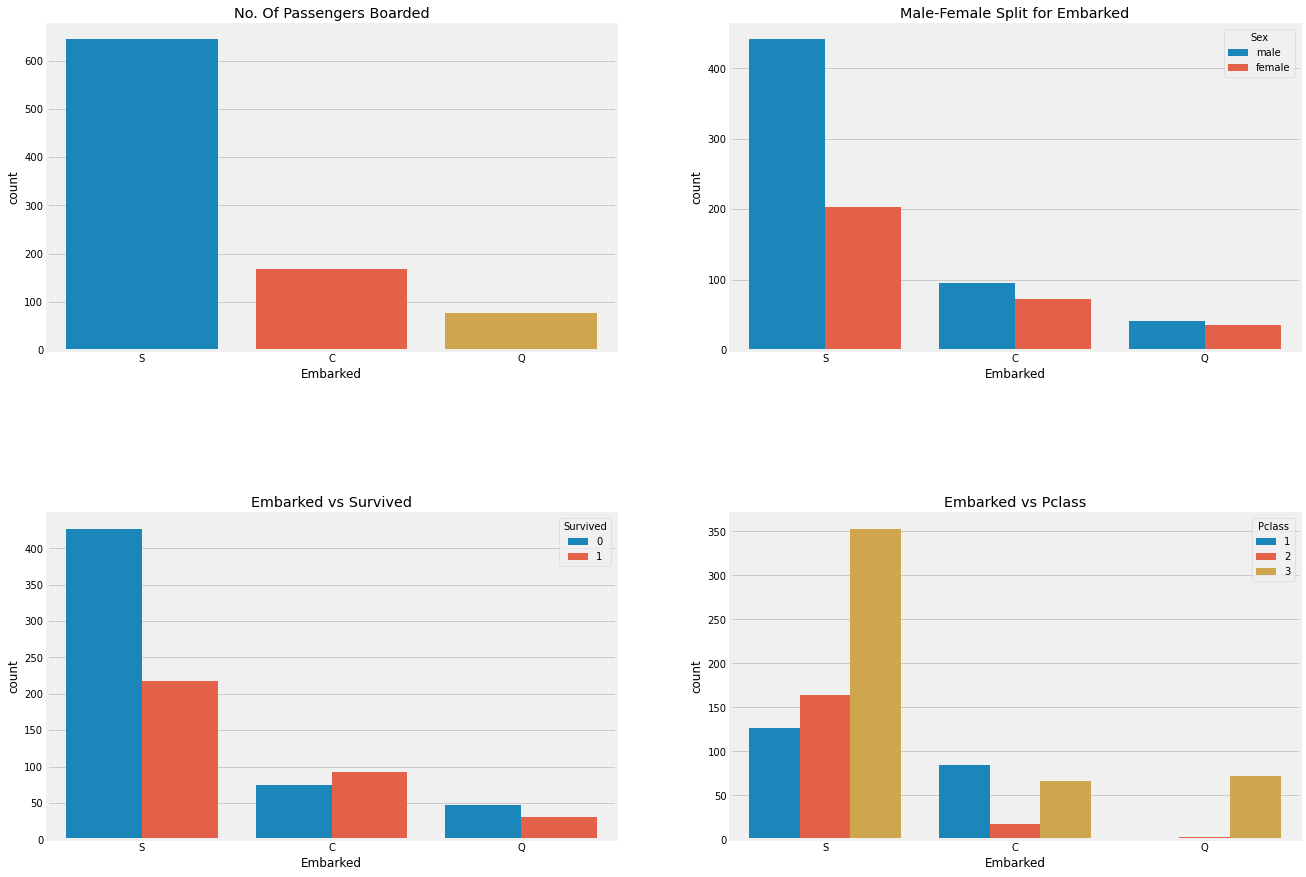

In [23]:
f,ax=plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- S에서 탑승한 승객이 가장 많으며, 그들은 대부분 Pclass 3임
- C에서 탑승한 승객의 생존 비율이 높으며, 그 이유는 Pclass 1, Pclass 2 승객의 구조 때문
- S에서 대부분의 부자들이 탑승하였지만 생존 비율이 낮은 이유는 약 81%의 Pclass 3 승객이 생존하지 못했기 때문
- Q에서 탑승한 승객의 약 95%는 Pclass3

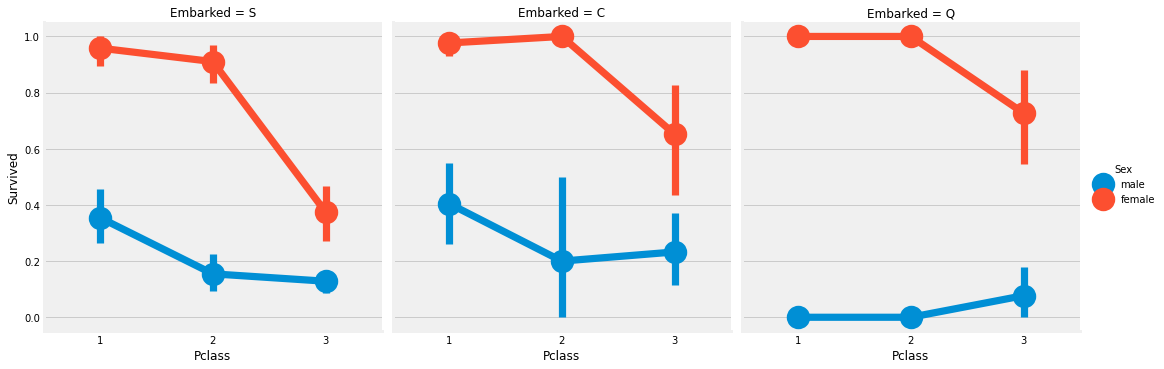

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass와 상관없이 Pclass 1과 Pclass 2의 생존확률은 거의 1
- 항구 S는 Pclass 3 남성과 여성 모두 생존확률이 매우 낮기 때문에 Pclass 3 승객에게 매우 불운해보임
- 항구 Q는 거의 모든 사람이 Pclass 3이기 때문에 남성 생존확률이 가장 좋지 않아보임

#### Embarked 결측값 채우기
- 가장 많은 탑승객이 탑승한 S로 NaN 값을 채우기

In [25]:
data['Embarked'].fillna('S', inplace=True)  

In [26]:
data.Embarked.isnull().any()  # NaN 값 확인

False

### SibSp - Discrete Feature (타이타닉 호에 동승한 자매/배우자의 수)

In [27]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


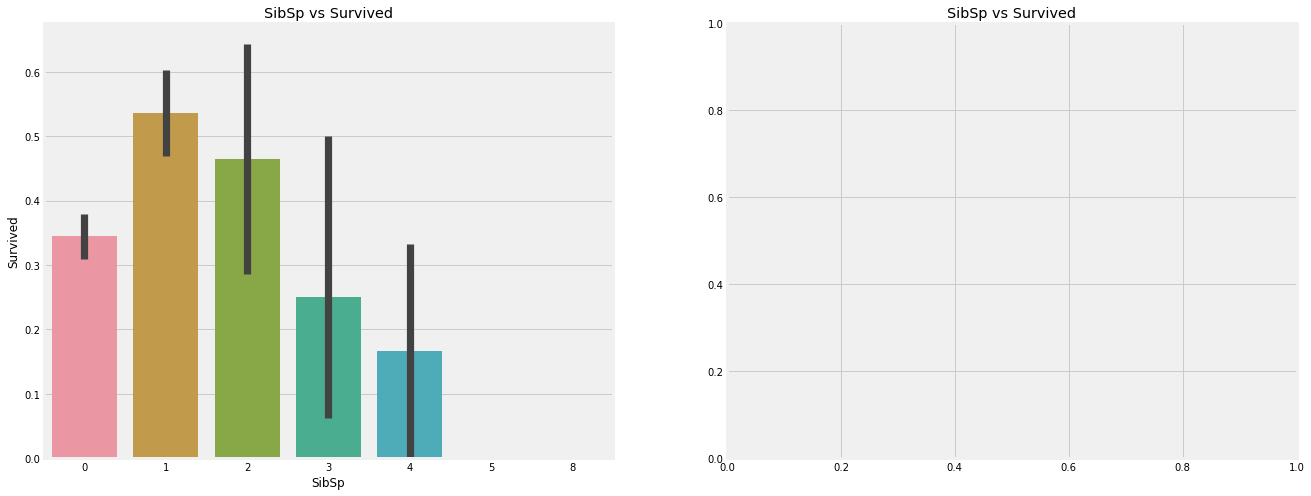

In [28]:
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

Text(0.5, 1.0, 'SibSp vs Survived')

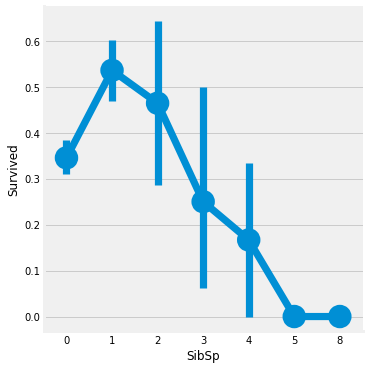

In [29]:
# 위 코드에서 ax[1]의 그래프가 그려지지 않아서 코드 따로 작성
sns.factorplot('SibSp', 'Survived', data=data)
ax[1].set_title('SibSp vs Survived')

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 형제/자매 없이 혼자 탑승한 승객의 생존확률은 34.5%
- 형제/자매의 수가 증가하면 생존확률은 감소
- 5-8명의 구성원이 있는 가족의 생존확률은 0%
- 그 이유는 Pclass : Pclass 3에 있는 모든 대가족이 사망

### Parch : 타이타닉 호에 동승한 부모/자식의 수

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


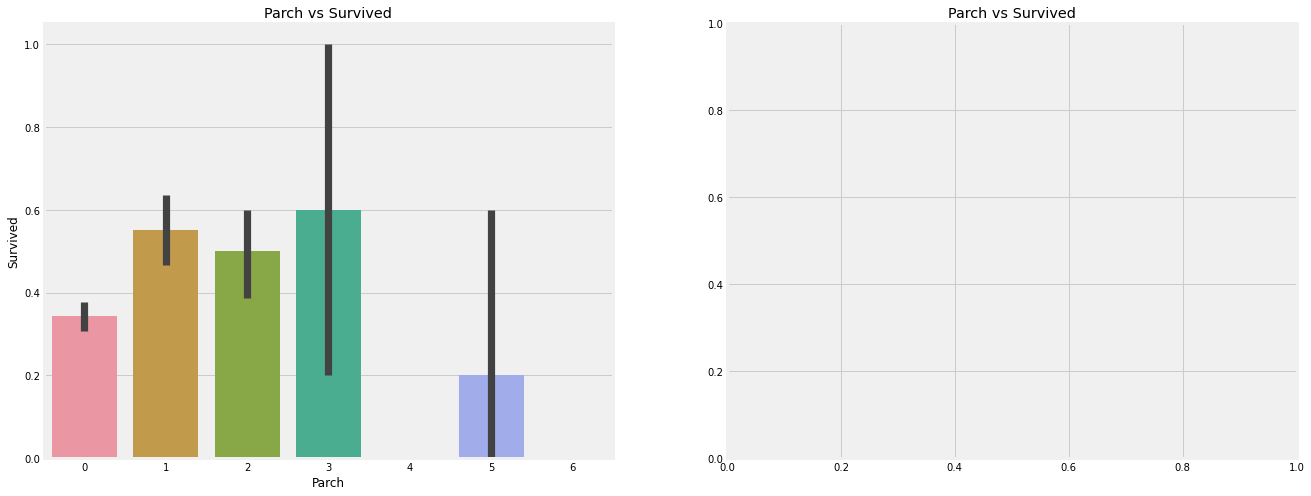

In [32]:
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

Text(0.5, 1.0, 'Parch vs Survived')

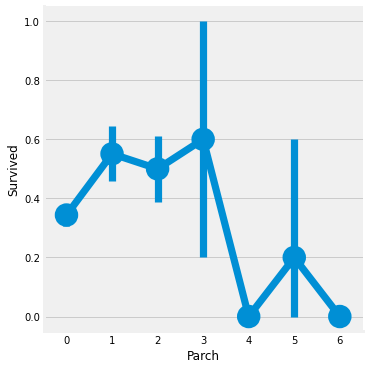

In [33]:
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

- 부모가 탑승한 승객은 생존확률이 높지만, 숫자가 증가함에 따라 감소
- 생존확률은 배에 1-3명의 부모가 있는 사람이 좋음
- 혼자 있는 사람의 생존확률은 낮고, 배에 4명 이상의 부모가 있는 사람의 생존확률은 줄어듦 

### Fare - Continous Feature

In [34]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


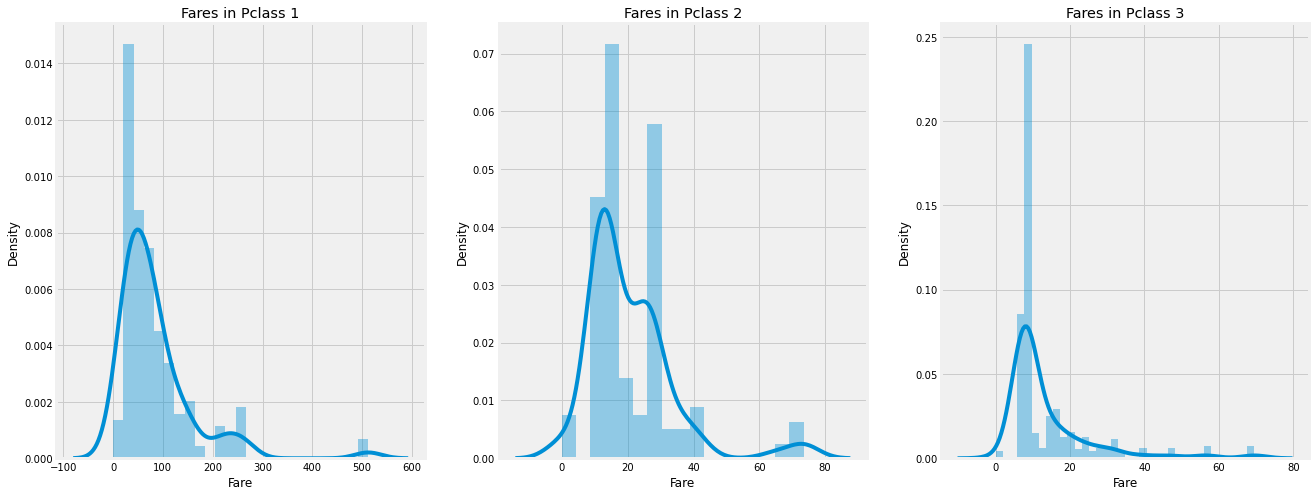

In [35]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### 모든 Feature에 대한 간단한 관찰
- Sex : 여성의 생존확률은 남성에 비해 높음
- Pclass : Pclass 1 승객의 생존확률이 높으며, Pclass 3 승객의 생존확률은 매우 낮음. 여성의 경우 Pclass 1 승객의 생존확률은 거의 1이며 Pclass 2의 승객의 생존확률도 높음
- Age : 5-10세 미만의 아이들은 생존확률이 높으며, 15-35세 승객들이 가장 많이 사망
- Embarked : 대부분의 Pclass 1의 승객들이 S에서 탑승했음에도 불구하고 생존확률은 C에서 더 높음. Q의 승객들은 모두 Pclass 3
- Parch + SibSp : 1-2명의 형제/자매, 배우자 또는 1-3명의 부모를 가진 승객이 혼자 있거나 대가족인 승객보다 더 높은 생존확률을 가짐 

### Features 간의 상관관계

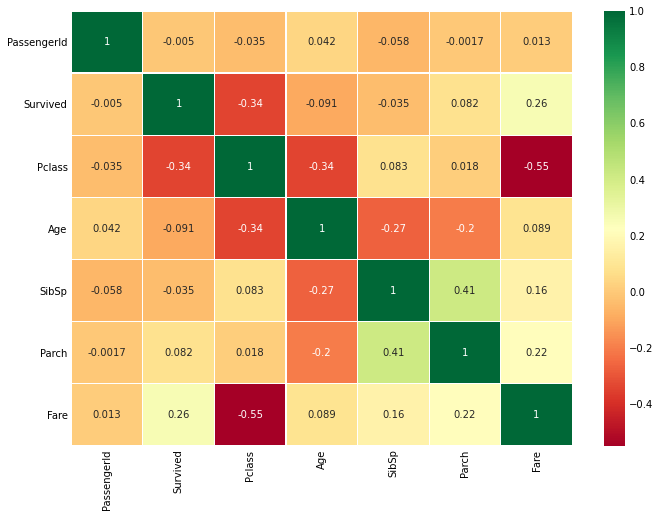

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- features 간의 상관관계가 크지 않음 : 가장 높은 상관관계는 SibSp와 Parch로 0.41

# Part2 : Feature Engineering and Data Cleaning

## Age_band
- 승객의 최대 연령은 80세이므로, 0 - 80 범위에서 5개의 bin으로 나눈 bin의 크기는 16

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


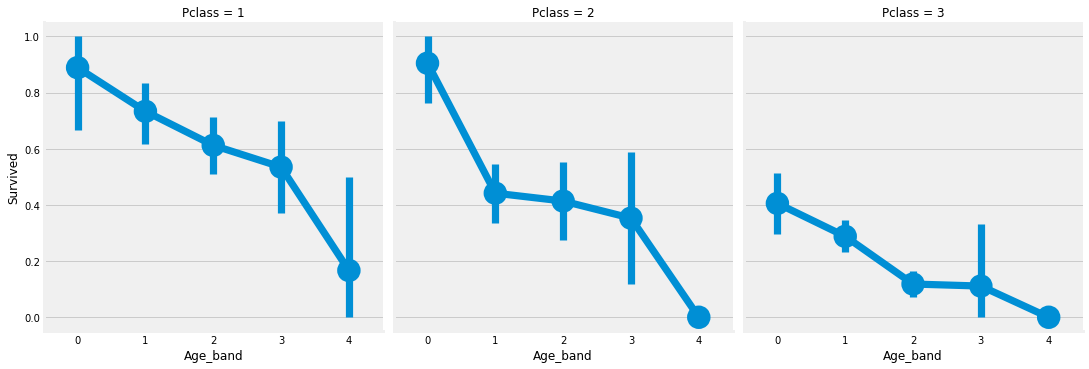

In [39]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

## Family_Size and Alone

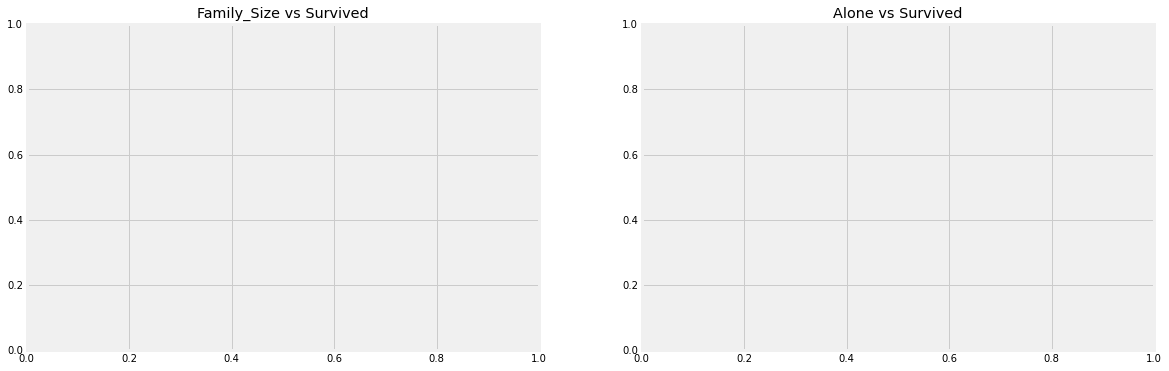

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

Text(0.5, 1.0, 'Family_Size vs Survived')

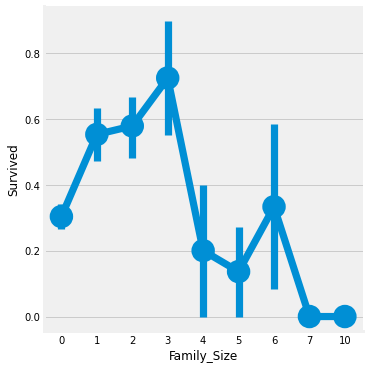

In [41]:
# 위 코드에서 factorplot 그래프가 안 나와서 아래 코드 별도로 작성
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

Text(0.5, 1.0, 'Alone vs Survived')

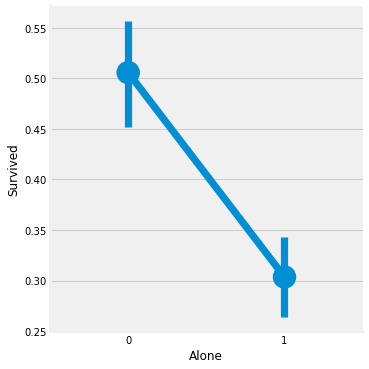

In [42]:
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

- 혼자 탑승했거나 family_size = 0인 경우 생존확률이 매우 낲음
- family_size > 4인 경우도 생존확률이 낮음

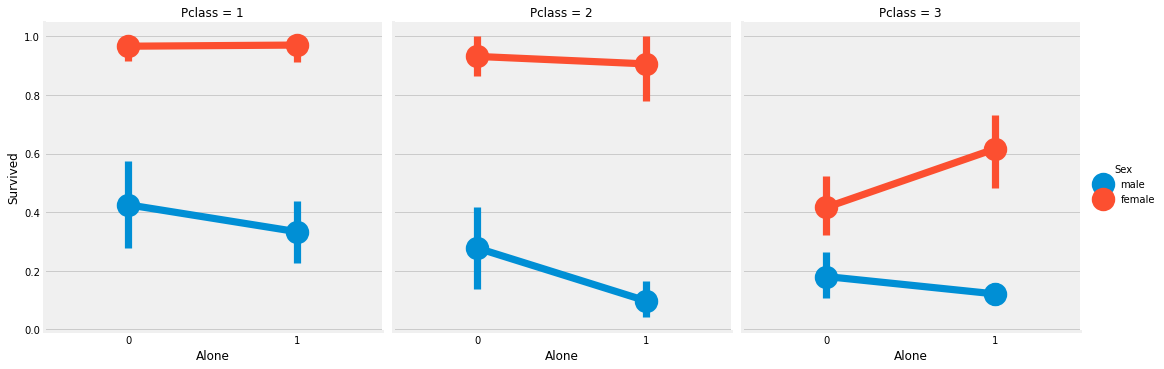

In [43]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- 혼자 탑승한 승객이 가족과 함께 탑승한 손님보다 생존확률이 높은 Pclass 3의 여성을 제외하고는 혼자 탑승한 승객은 성별, Pclass와 상관없이 생존확률이 낮음을 확인할 수 있음

## Fare_Range
- Fare 또한 continuous(연속형) feature 이므로 ordinal(순서형) 값으로 변환해야 함 : pandas.qcut 이용

In [44]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)  # Fare 값을 4개의 bin에 균등하게 배열
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- 요금 범위가 증가함에 따라 생존확률이 증가

In [45]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

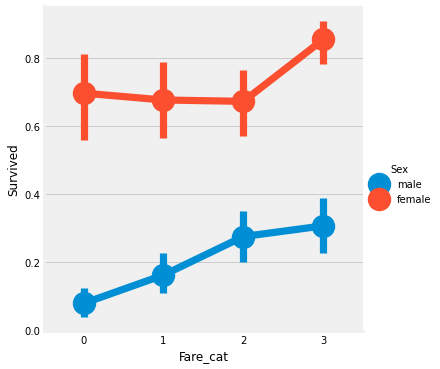

In [46]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

## Converting String Values into Numeric
- 기계 학습 모델에 문자열을 전달할 수 없기 때문에 Sex, Embarked feature를 숫자 값으로 변환해야 함

In [47]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

### 필요없는 Feature 제거
- Name : 범주형 값으로 변환할 수 없으므로 제거
- Age : Age_band feature가 있으므로 제거
- Ticket : 범주화 할 수 없는 임의의 문자열이므로 제거
- Fare : Fare_cat feature가 있으므로 제거
- Cabin : 많은 결측값이 있고, 많은 승객들이 여러 개의 Cabin을 가지고 있으므로 제거
- Fare_Range : Fare_cat feature가 있으므로 제거
- PassengerId : 범주화 할 수 없으므로 제거

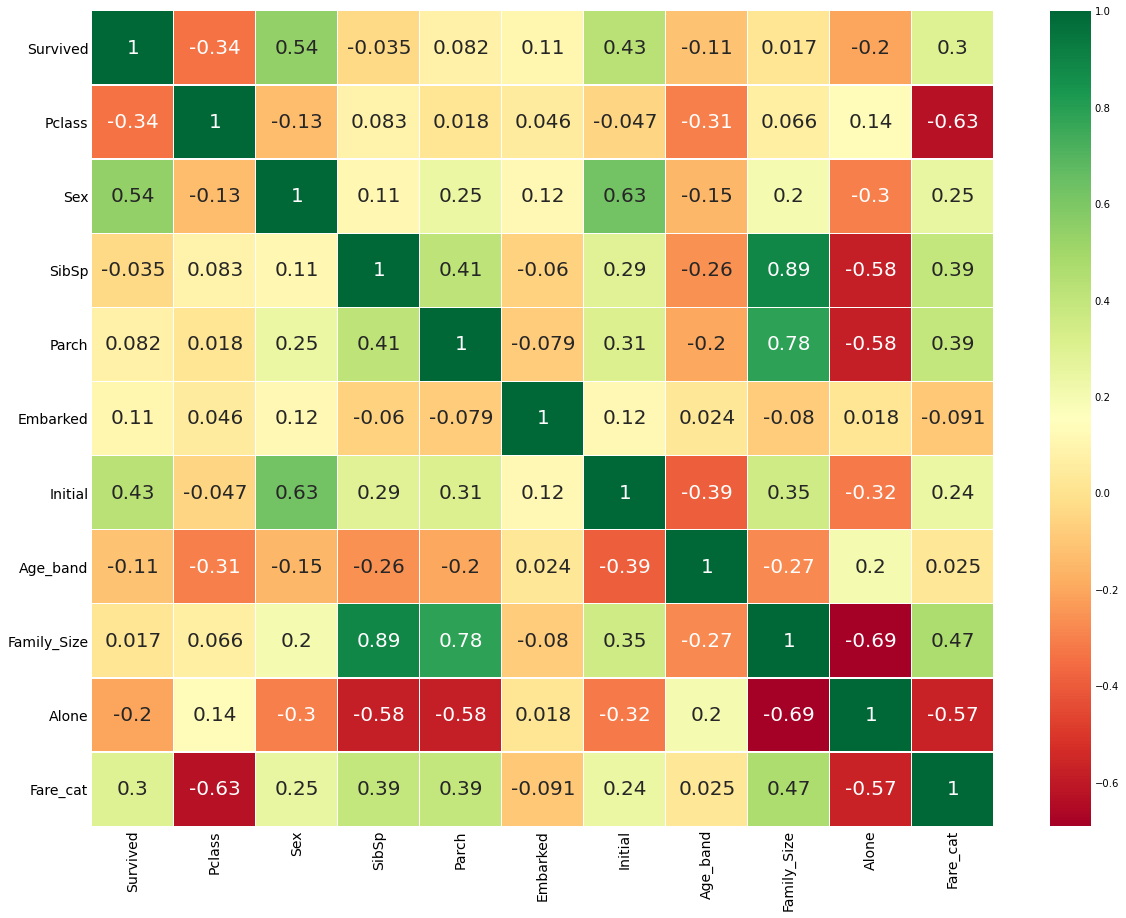

In [48]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

긍정적인 상관관계
- SipSp & Family_Size
- Parch & Family_Size

부정적인 상관관계
- Alone & Family_Size

# Part3 : Predictive Modeling

사용할 알고리즘

1. Logistic Regression

2. Support Vector Machines(Linear and radial)

3. Random Forest

4. K-Nearest Neighbours

5. Naive Bayes

6. Decision Tree

7. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [50]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [51]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machines(linear-SVM)

In [52]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [54]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


### K-Nearest Neighbors(KNN)

In [55]:
model = KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


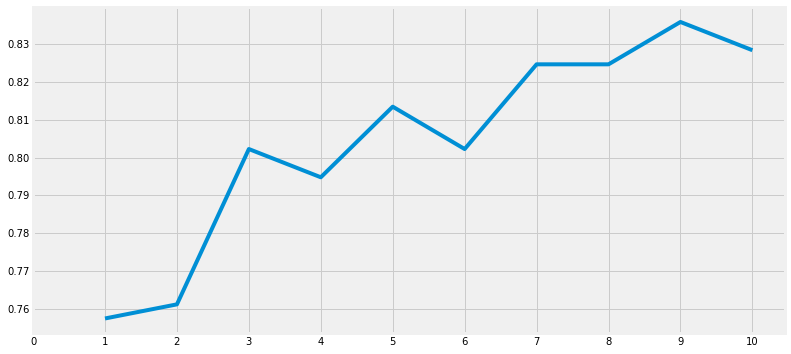

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [56]:
# KNN n 값에 따른 정확도 그래프
a_index = list(range(1, 11))
a=pd.Series()
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [57]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [58]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8208955223880597


## Cross Validation

In [59]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # shuffle=True 넣어서 오류 해결
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.804732,0.046295
Naive Bayes,0.795843,0.054861
Random Forest,0.809238,0.046151


<AxesSubplot:>

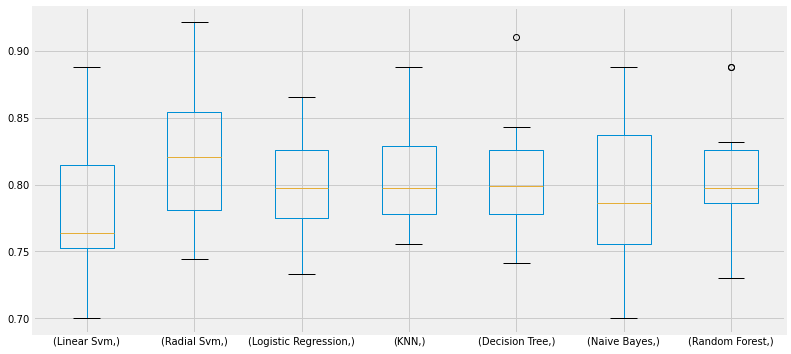

In [60]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

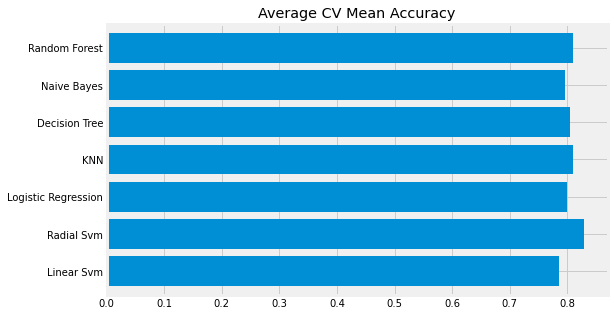

In [61]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

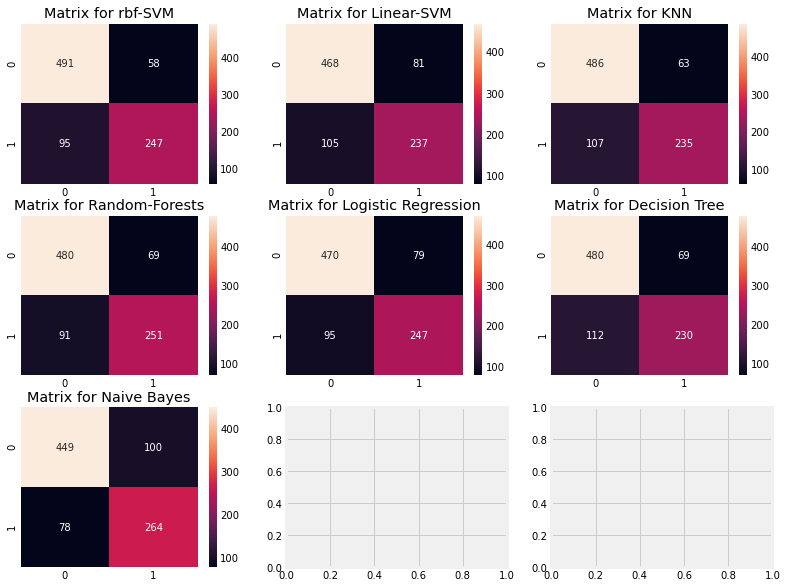

In [62]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1],annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2],annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0],annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1],annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2],annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0],annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

Confusion Matrix 해석
- [0, 0], [1, 1] : 각 클래스에 대한 올바른 예측의 수 
- [0, 1], [1, 0] : 각 클래스에 대한 잘못된 예측의 수

모든 행렬을 보면, rbf-SVM은 죽은 승객을 정확하게 예측할 가능성이 더 높지만, Navie Bayes는 살아남은 승객을 정확하게 예측할 가능성이 더 높음

## Hyper-Parameters Tuning

### SVM

In [63]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forest

In [64]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


- Rbf-Svm의 best score는 C=0.4, gamma=0.3일 때 82.82%  
- Random Forest는 n_estimators=300 일 때 81.8%

## Ensembling

1. Voting Classifier

2. Bagging

3. Boosting.

### Voting Classifier

In [65]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                              ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                              ('LR', LogisticRegression(C=0.05)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8226716604244693


### Bagging

#### Bagged KNN

In [66]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Magged DecisionTree

In [67]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

#### AdaBoost(Adaptive Boosting)

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:' ,result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [70]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


- AdaBoost에서 가장 높은 정확도를 얻음

In [71]:
# AdaBoost + 하이퍼파라미터 튜닝
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


- n_estimators = 100, learing_rate = 0.1일 때 AdaBoost에서 83.16%의 가장 높은 정확도를 얻음

### Confustion Matrix for the Best Model 

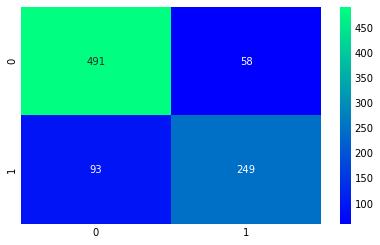

In [72]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result= cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

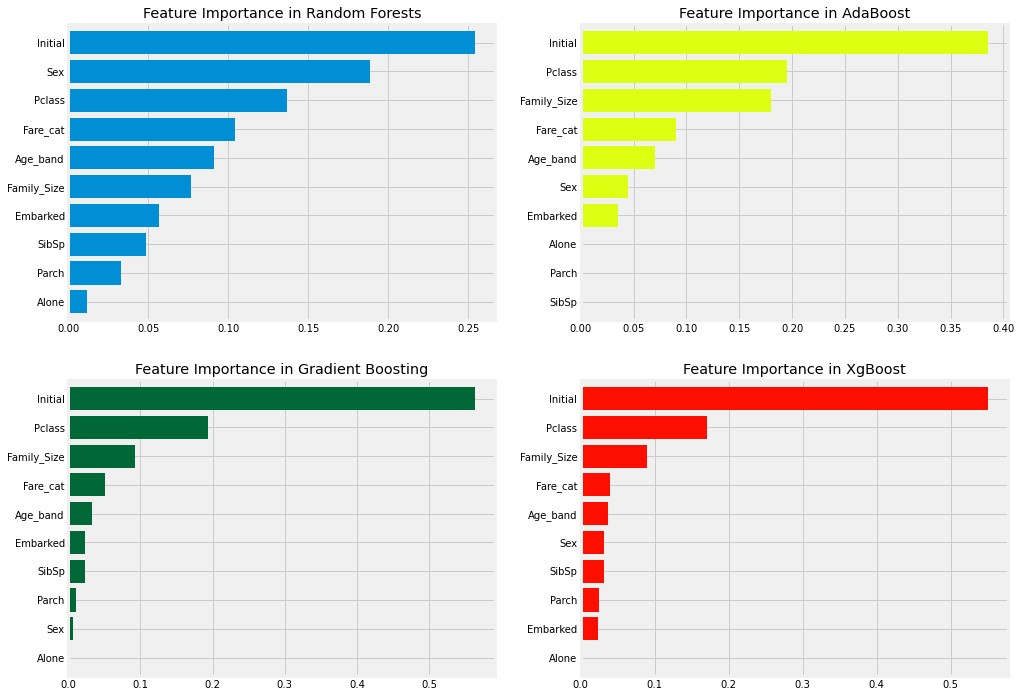

In [73]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()

- 일반적으로 중요한 feature는 Initial, Pclass, Family_size, Fare_cat
- Sex는 Random Forest에서만 중요해보임